#1) Overall Data Analysis


### 1.1) Importation of Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 287 (delta 10), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (287/287), 301.25 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Updating files: 100% (231/231), done.


###1.2) Loading the dataset

In [ ]:
df=pd.read_excel('/content/Datasets/Flight Prices/flight_price.xlsx')


###1.3) Reading dataset

In [ ]:
print(df.head(5))
print(df.tail(5))


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
           Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Ko

In [ ]:
print(df.info())
print(df.columns)
print(df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
<bound method NDFrame.describe of            Airline Date

###1.3) Checking for null value

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df['Route'].mode()

,Route
0,DEL → BOM → COK


### 1.4) Filtering the data


In [ ]:
df[df['Destination']=='New Delhi']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...
10638,Jet Airways,21/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21:25,11:25 19 Mar,14h,1 stop,In-flight meal not included,7832
10660,Vistara,21/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 19 Mar,2h 55m,non-stop,No info,4878
10667,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087




*   Filter out data where no of stops is 1 and price is more than 2000Rs.



In [ ]:
df[(df['Total_Stops']=='1 stop') & (df['Price']>2000)].count()

,0
Airline,5625
Date_of_Journey,5625
Source,5625
Destination,5625
Route,5625
Dep_Time,5625
Arrival_Time,5625
Duration,5625
Total_Stops,5625
Additional_Info,5625




*   Filter out data where source is Bangalore and Airline is Indigo.



In [ ]:
df[(df['Source']=='Banglore') & (df['Airline']=='IndiGo')].count()

,0
Airline,523
Date_of_Journey,523
Source,523
Destination,523
Route,523
Dep_Time,523
Arrival_Time,523
Duration,523
Total_Stops,523
Additional_Info,523




*   Filter out data where Aditional info is no info and price is more than 3000Rs.



In [ ]:
df[(df['Additional_Info']=='No info') & ( df['Price']>3000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


###1.5) Fixing the null value



In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df['Source'].nunique()

5

In [ ]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [ ]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [ ]:
for i in df['Source'].unique():
  print(i,len(df[df['Source']==i]))


Banglore 2197
Kolkata 2871
Delhi 4536
Chennai 381
Mumbai 697


### 2) Column wise Cleaning

####2.2) Date of Journey

In [ ]:
# days=[]
# months=[]
# years=[]
# for i in df['Date_of_Journey']:
#   days.append(i.split('/')[0])
#   months.append(i.split('/')[1])
#   years.append(i.split('/')[2])

In [ ]:
# df['Day']=days
# df['Month']=months
# df['Year']=years

In [ ]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0].str.strip().astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].str.strip().astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].str.strip().astype(int)

In [ ]:
del df['Date_of_Journey']

In [ ]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Day              10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


##### Departure time

In [ ]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)


In [ ]:
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [ ]:
del df['Dep_Time']

In [ ]:
df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


#####  Arrival Time

In [ ]:
df['Arrival_HRS']=df['Arrival_Time'].str.split(':').str[0].astype(int)


In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_HRS
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13


In [ ]:
df['Arrival_Min']=df['Arrival_Time'].str.split(':').str[1].str.split().str[0].astype(int)


In [ ]:
df['Arrival_date']=df['Arrival_Time'].str.split(':').str[1].str.split().str[1].astype(str)
df['Arrival_Month']=df['Arrival_Time'].str.split(':').str[1].str.split().str[2].astype(str)


In [ ]:
del df['Arrival_Time']

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_HRS,Arrival_Min,Arrival_Date,Arrival_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,22,Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,nan,nan


#### Duration


In [ ]:
# Hour nikaalna — agar 'h' hai toh usko split karke int mein convert karo, warna 0
df['Duration_hour'] = df['Duration'].apply(lambda x: int(x.split('h')[0].strip()) if 'h' in x else 0)

# Minute nikaalna — agar 'm' hai toh usko split karke int mein convert karo, warna 0
df['Duration_min'] = df['Duration'].apply(lambda x: int(x.split('m')[0].split()[-1].strip()) if 'm' in x else 0)

# Total duration in minutes
df['Total_duration_min'] = df['Duration_hour'] * 60 + df['Duration_min']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10682 non-null  object
 1   Source              10682 non-null  object
 2   Destination         10682 non-null  object
 3   Route               10682 non-null  object
 4   Duration            10682 non-null  object
 5   Total_Stops         10682 non-null  object
 6   Additional_Info     10682 non-null  object
 7   Price               10682 non-null  int64 
 8   Day                 10682 non-null  int64 
 9   Month               10682 non-null  int64 
 10  Year                10682 non-null  int64 
 11  Dep_Hour            10682 non-null  int64 
 12  Dep_Minute          10682 non-null  int64 
 13  Arrival_HRS         10682 non-null  int64 
 14  Arrival_Min         10682 non-null  int64 
 15  Arrival_Date        10682 non-null  object
 16  Arrival_Month       10682 n

In [ ]:
del df['Route']
del df['Duration']
del df['Duration_hour']
del df['Duration_min']

In [ ]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Minute,Arrival_HRS,Arrival_Min,Arrival_Date,Arrival_Month,Total_duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,22,Mar,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,nan,nan,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,10,Jun,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,nan,nan,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,nan,nan,285


#####

KPI's




Text(0, 0.5, 'Average Price')

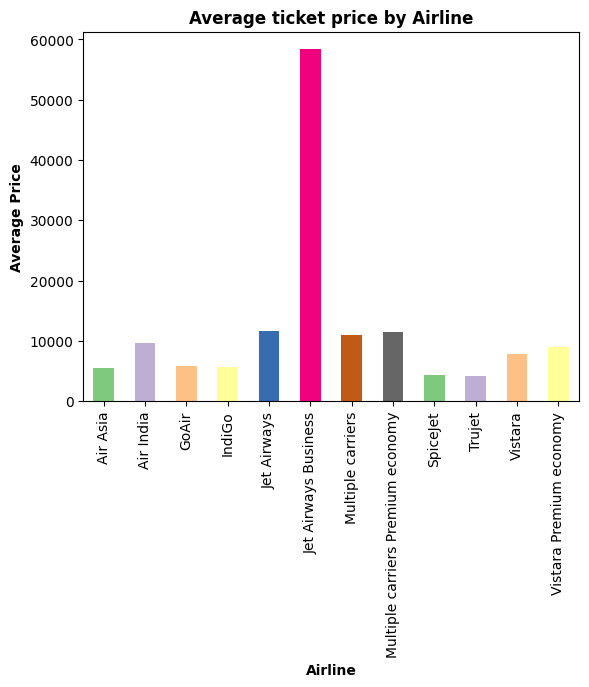

In [ ]:
# Average ticket price by Airline
data=df.groupby('Airline')['Price'].mean()
data.plot(kind='bar',color=plt.get_cmap('Accent').colors)
plt.title('Average ticket price by Airline',weight='bold')
plt.xlabel('Airline',weight='bold')
plt.ylabel('Average Price',weight='bold')

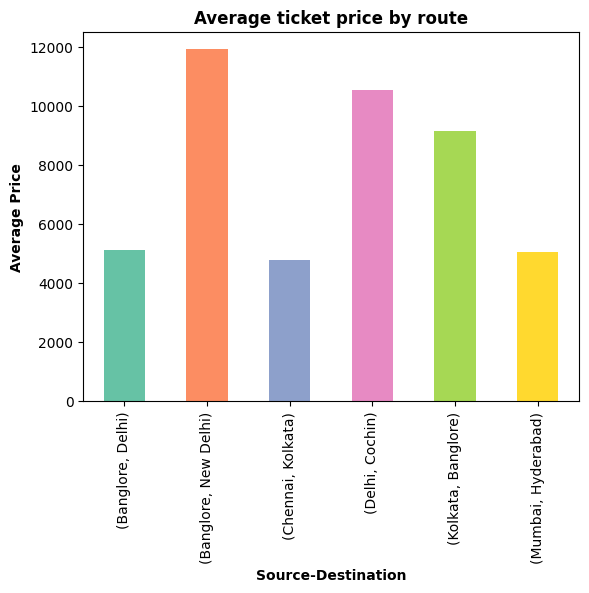

In [ ]:
# Average Ticket Price by Route (Source → Destination)
data=df.groupby(['Source','Destination'])['Price'].mean()
data.plot(kind='bar',color=plt.get_cmap('Set2').colors)
plt.title('Average ticket price by route',weight='bold')
plt.xlabel('Source-Destination',weight='bold')
plt.ylabel('Average Price',weight='bold')
plt.show()

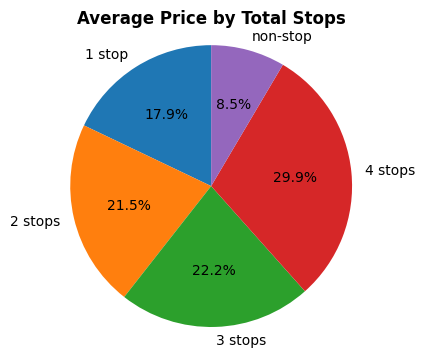

In [ ]:
# Average Price by Number of Stops
data=df.groupby('Total_Stops')['Price'].mean()
plt.figure(figsize=(4,4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Price by Total Stops',weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()


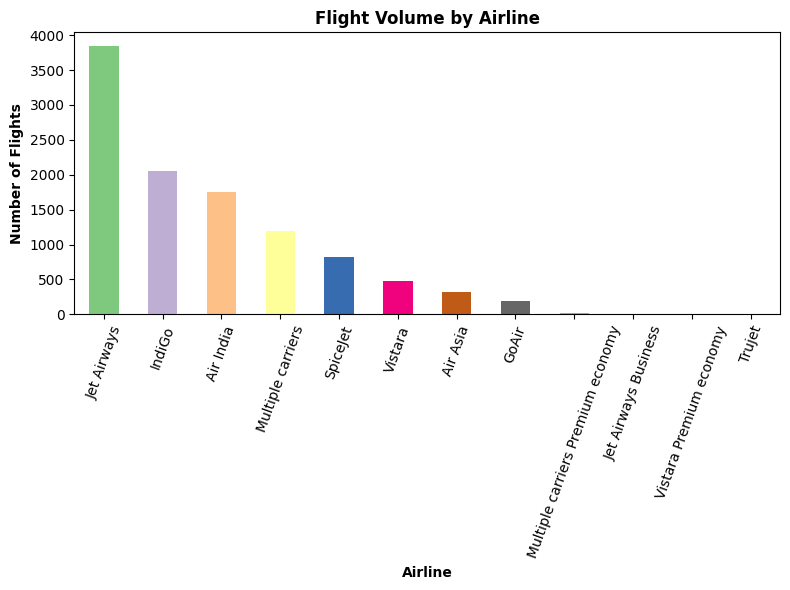

In [ ]:
# Flight Volume by Airline
flight_counts=df['Airline'].value_counts()
plt.figure(figsize=(8,6))
flight_counts.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title('Flight Volume by Airline',weight='bold')
plt.xlabel('Airline',weight='bold')
plt.ylabel('Number of Flights',weight='bold')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()



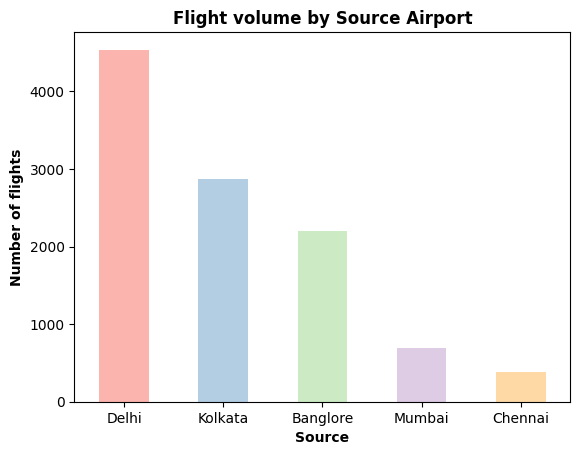

In [ ]:
# Flight Volume by Source Airport
flight_count=df['Source'].value_counts()
flight_count.plot(kind='bar',color=plt.get_cmap('Pastel1').colors)

plt.title('Flight volume by Source Airport',weight='bold')
plt.xlabel('Source',fontweight='bold')
plt.ylabel('Number of flights',weight='bold')
plt.xticks(rotation=0)
plt.show()

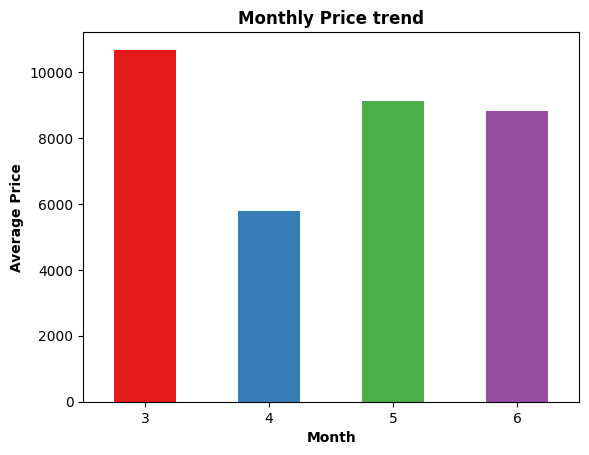

In [ ]:
# Monthly Price Trend
monthly_price=df.groupby('Month')['Price'].mean()
monthly_price.plot(kind='bar',color=plt.get_cmap('Set1').colors)
plt.title('Monthly Price trend',weight='bold')
plt.xlabel('Month',weight='bold')
plt.ylabel('Average Price',weight='bold')
plt.xticks(rotation=0)
plt.show()

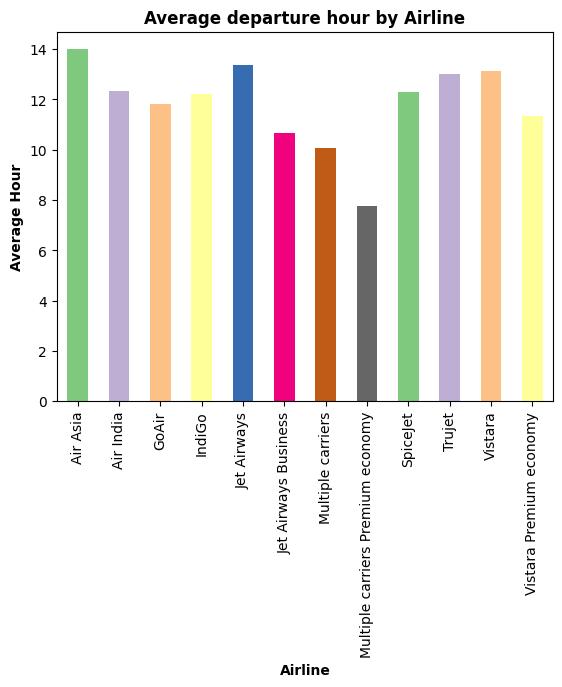

In [ ]:
# Average Departure Hour by Airline
dep_hrs=df.groupby('Airline')['Dep_Hour'].mean()
dep_hrs.plot(kind='bar',color=plt.get_cmap('Accent').colors)
plt.title('Average departure hour by Airline',weight='bold')
plt.xlabel('Airline',weight='bold')
plt.ylabel('Average Hour',weight='bold')
plt.show()